In [1]:
import os
import numpy as np
import cv2
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from glob import glob
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from time import time
from torch.utils.data import DataLoader, TensorDataset

## Preprocessing

In [2]:
transformer = transforms.Compose([
    transforms.ToTensor(),
])

In [3]:
khuslen_dir = glob('./train_pics/khuslen/*')
baky_dir = glob('./train_pics/baky/*')
other_dir = glob('./train_pics/other/*')

In [4]:
khuslen = [cv2.imread(x) for x in khuslen_dir]
baky    = [cv2.imread(x) for x in baky_dir]
other   = [cv2.imread(x) for x in other_dir]

In [5]:
size = 224
khuslen = [cv2.resize(x, (size, size)) for x in khuslen]
baky    = [cv2.resize(x, (size, size)) for x in baky]
other   = [cv2.resize(x, (size, size)) for x in other]

In [81]:
torch.tensor(khuslen_gray).unsqueeze(0).shape

torch.Size([1, 16, 224, 224])

In [6]:
khuslen_gray = [cv2.cvtColor(x, cv2.COLOR_BGR2GRAY) for x in khuslen]
baky_gray    = [cv2.cvtColor(x, cv2.COLOR_BGR2GRAY) for x in baky]
other_gray   = [cv2.cvtColor(x, cv2.COLOR_BGR2GRAY) for x in other]

In [7]:
khuslen_gray[0]

array([[252, 252, 252, ..., 213, 213, 213],
       [252, 252, 252, ..., 213, 211, 211],
       [252, 252, 252, ..., 212, 210, 213],
       ...,
       [142, 146, 151, ..., 224, 224, 224],
       [151, 148, 138, ..., 224, 224, 224],
       [154, 149, 155, ..., 224, 224, 224]], dtype=uint8)

In [8]:
dkhuslen = [transformer(x) for x in khuslen_gray]
dbaky = [transformer(x) for x in baky_gray]
dother = [transformer(x) for x in other_gray]

In [9]:
# making it to torch tensor
base = torch.tensor([])
for i in dbaky:
    x=i.unsqueeze(0)
    base = torch.cat((base,x), 0)
dbaky = base
base = torch.tensor([])
for i in dkhuslen:
    x=i.unsqueeze(0)
    base = torch.cat((base,x), 0)
dkhuslen = base
base = torch.tensor([])
for i in dother:
    x=i.unsqueeze(0)
    base = torch.cat((base,x), 0)
dother = base

In [10]:
train_y= [0]*len(dkhuslen)+[1]*len(dbaky)+[2]*len(dother)

In [11]:
train_y = torch.tensor(train_y)

In [12]:
train_y

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
train_x = torch.cat((dkhuslen,dbaky,dother),0)

In [14]:
train_x.shape

torch.Size([48, 1, 224, 224])

## Preprocessing of test data

In [59]:
khuslen_test_dir = glob('./test_pics/khuslen/*')
baky_test_dir = glob('./test_pics/baky/*')
other_test_dir = glob('./test_pics/other/*')

In [60]:
khuslent = [cv2.imread(x) for x in khuslen_test_dir]
bakyt    = [cv2.imread(x) for x in baky_test_dir]
othert   = [cv2.imread(x) for x in other_test_dir]

In [61]:
size = 224
khuslent = [cv2.resize(x, (size, size)) for x in khuslent]
bakyt    = [cv2.resize(x, (size, size)) for x in bakyt]
othert   = [cv2.resize(x, (size, size)) for x in othert]

In [62]:
khuslent_gray = [cv2.cvtColor(x, cv2.COLOR_BGR2GRAY) for x in khuslent]
bakyt_gray    = [cv2.cvtColor(x, cv2.COLOR_BGR2GRAY) for x in bakyt]
othert_gray   = [cv2.cvtColor(x, cv2.COLOR_BGR2GRAY) for x in othert]

In [63]:
khuslent_gray[0]

array([[240, 240, 240, ..., 242, 242, 242],
       [240, 240, 240, ..., 242, 242, 242],
       [240, 240, 240, ..., 242, 242, 242],
       ...,
       [234, 234, 234, ...,  25,  28,  30],
       [234, 234, 234, ...,  26,  27,  28],
       [234, 234, 234, ...,  24,  23,  23]], dtype=uint8)

In [64]:
dkhuslent = [transformer(x) for x in khuslent_gray]
dbakyt = [transformer(x) for x in bakyt_gray]
dothert = [transformer(x) for x in othert_gray]

In [65]:
# making it to torch tensor
base = torch.tensor([])
for i in dbakyt:
    x=i.unsqueeze(0)
    base = torch.cat((base,x), 0)
dbakyt = base
base = torch.tensor([])
for i in dkhuslent:
    x=i.unsqueeze(0)
    base = torch.cat((base,x), 0)
dkhuslent = base
base = torch.tensor([])
for i in dothert:
    x=i.unsqueeze(0)
    base = torch.cat((base,x), 0)
dothert = base

In [66]:
dkhuslent.shape

torch.Size([7, 1, 224, 224])

In [67]:
test_y= [0]*len(dkhuslent)+[1]*len(dbakyt)+[2]*len(dothert)

In [68]:
test_y = torch.tensor(test_y)

In [69]:
test_y

tensor([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [70]:
test_x = torch.cat((dkhuslent,dbakyt,dothert),0)

In [71]:
test_x.shape

torch.Size([17, 1, 224, 224])

## heyo

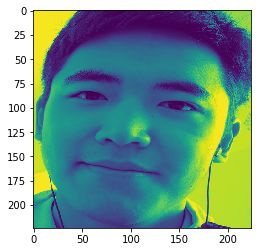

In [28]:
plt.imshow(  dkhuslen[0][0]  )

In [29]:
dkhuslen.shape

torch.Size([16, 1, 224, 224])

In [30]:
model = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=4, kernel_size=8, stride=1, padding=0),
    nn.MaxPool2d(kernel_size=4),
    nn.ReLU(), # activation
    
    nn.Conv2d(in_channels=4, out_channels=16, kernel_size=5, stride=1, padding=0),
    nn.MaxPool2d(kernel_size=2),
    nn.ReLU(), # activation
    
    nn.Conv2d(in_channels=16, out_channels=25, kernel_size=3, stride=1, padding=0),
    nn.MaxPool2d(kernel_size=2),
    nn.ReLU(), # activation
    
    nn.Flatten(),
    nn.Linear(3025, 3), # activation
    nn.Softmax(dim= None)
)

In [31]:
#  hyperparameters
lr=1e-3
batch_size = 16 # train_x.size()[0]//2
n_epoch = 30

In [32]:
from torch.utils.data import DataLoader, TensorDataset
train = TensorDataset(train_x, train_y)
train_loader = DataLoader(dataset=train, batch_size=batch_size, shuffle=True)

# Mean Squared Error -> Loss ------------- < Cross Entropy Loss
criterian = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr) # Adam, RMSProp

In [33]:
from time import time
train_history = []
val_history = []
print('training...')
for epoch in range(1, n_epoch + 1):
    st = time()
    train_loss = 0
    for xb, yb in train_loader: # getting data by batch size
        
        optimizer.zero_grad()
        output = model(xb.float()) # outputs 10
        loss = criterian(output, yb)
        
        loss.backward()
        optimizer.step()
        # print(loss.item())
        train_loss += loss.item() * yb.shape[0]
        
    train_loss = train_loss/train_x.size()[0]
    train_history.append(train_loss)
    
    
    pred = model(test_x.float())
    val_loss = criterian(pred, test_y)
    val_history.append(val_loss.item())
    
    print(f"e {epoch}: {train_loss}, {val_loss.item()}, {time() - st} sec")

training...


/home/aldo/anaconda3/lib/python3.7/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


e 1: 1.1072060664494832, 1.1134024858474731, 0.8590397834777832 sec
e 2: 1.089513619740804, 1.1021898984909058, 0.8362116813659668 sec
e 3: 1.0810110966364543, 1.100430965423584, 0.8085160255432129 sec
e 4: 1.072552005449931, 1.0969337224960327, 0.8517494201660156 sec
e 5: 1.0597997903823853, 1.110714316368103, 0.79030442237854 sec
e 6: 1.0375377933184307, 1.0965899229049683, 0.810476541519165 sec
e 7: 1.0094767212867737, 1.094417929649353, 0.7961828708648682 sec
e 8: 1.006177802880605, 1.143555998802185, 0.7830979824066162 sec
e 9: 0.9368383685747782, 1.0729230642318726, 0.8185417652130127 sec
e 10: 0.9047387440999349, 1.111854076385498, 0.8074765205383301 sec
e 11: 0.8884758949279785, 1.111568808555603, 0.8080682754516602 sec
e 12: 0.8371250828107198, 1.0690109729766846, 0.8173558712005615 sec
e 13: 0.8430252273877462, 1.087247371673584, 0.8129787445068359 sec
e 14: 0.8285428285598755, 1.1028779745101929, 0.8163254261016846 sec
e 15: 0.8127425114313761, 1.0761990547180176, 0.80598115

In [34]:
realOutput= []
for i in model(train_x):
    realOutput += [np.argmax(i.detach().numpy())]
print(realOutput)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2]


In [52]:
pred = model(test_x.float()).clone().detach()

/home/aldo/anaconda3/lib/python3.7/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [53]:
pred_ids = pred.argmax(1)

In [54]:
pred_ids

tensor([0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 2, 2])

In [55]:
print(classification_report(test_y, pred_ids))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      0.33      0.50         3
           2       1.00      1.00      1.00         6

   micro avg       0.87      0.87      0.87        15
   macro avg       0.92      0.78      0.79        15
weighted avg       0.90      0.87      0.84        15



In [56]:
test_x.shape

torch.Size([15, 1, 224, 224])

In [57]:
model(test_x).argmax(1)

tensor([0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 2, 2])

predicted:  khuslen


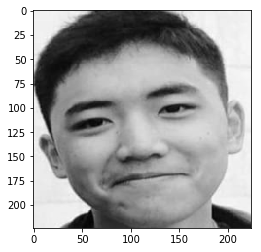

predicted:  khuslen


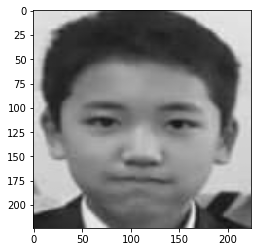

predicted:  khuslen


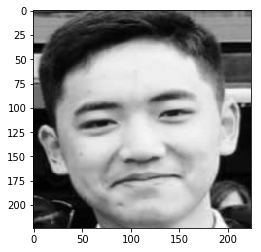

predicted:  khuslen


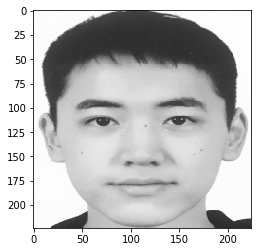

predicted:  khuslen


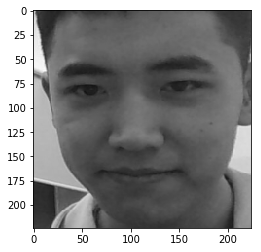

predicted:  khuslen


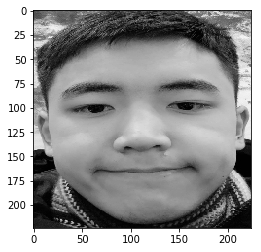

predicted:  khuslen


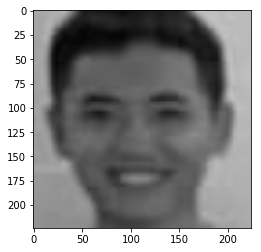

predicted:  baky


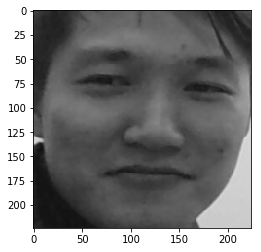

predicted:  khuslen


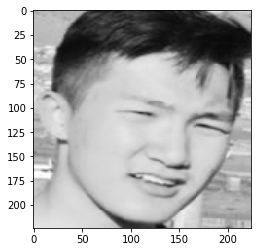

predicted:  other


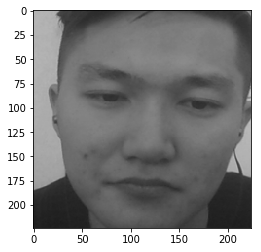

predicted:  other


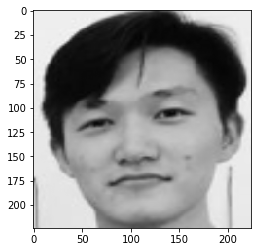

predicted:  other


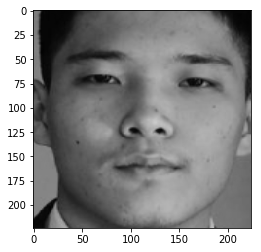

predicted:  other


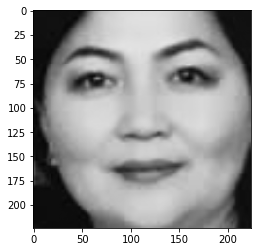

predicted:  other


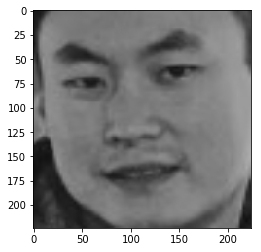

predicted:  other


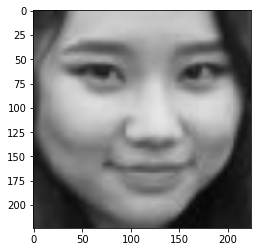

IndexError: index 15 is out of bounds for dimension 0 with size 15

<Figure size 432x288 with 0 Axes>

In [72]:
# Жишээ дата
data_id = 10
trans = transforms.ToPILImage(mode=None)
for data_id in range(17):
    prediction = pred_ids[data_id].item()
    if(prediction==0):
        prediction="khuslen"
    if(prediction==1):
        prediction="baky"
    if(prediction==2):
        prediction="other"
    print("predicted: ", prediction)
    
    plt.imshow(trans(test_x[data_id]).convert("RGB"), cmap='Greys_r')
    plt.show()
    plt.clf()

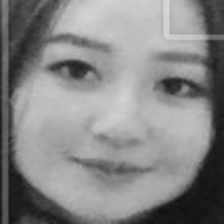

In [44]:
from PIL import Image
trans = transforms.ToPILImage(mode=None)
trans(test_x[data_id]).convert("RGB")

In [73]:
torch.save(model.state_dict(), 'cnn_khuslen_bakyz.pt')
print("model saved!")

model saved!
